Imports

In [31]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

Making Dataset

In [15]:
data_path = "Data"
data = torchvision.datasets.ImageFolder(data_path, transform=torchvision.transforms.ToTensor())

Identified 4 classes...


In [18]:
NUM_CLASSES = len(os.listdir(data_path))
print(f"Identified {NUM_CLASSES} classes...")

Identified 4 classes...


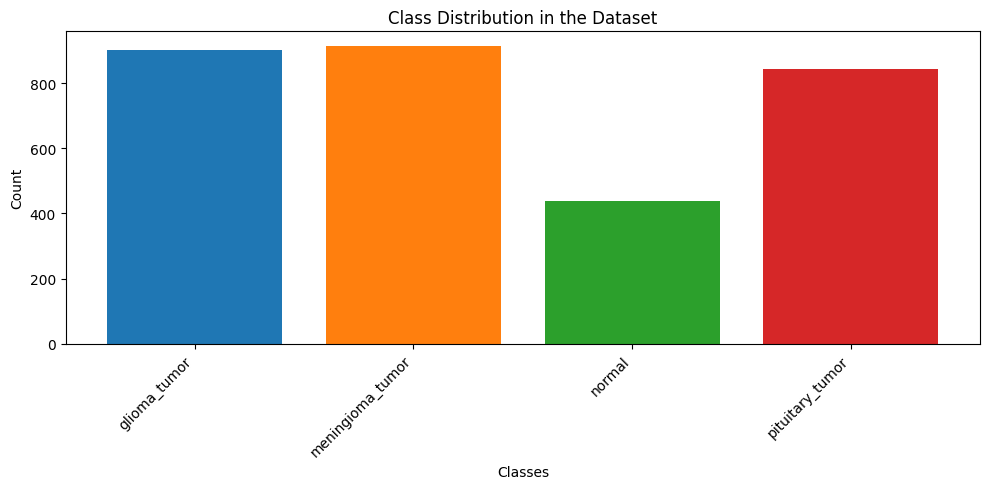

In [29]:

labels = [label for _, label in data]
label_counts = np.bincount(labels)
class_names = [folder_name for folder_name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder_name))]

plt.figure(figsize=(10, 5))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.bar(class_names, label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Split as a train and testing set:

In [25]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

train_size = int(train_ratio * len(data))
val_size = int(val_ratio * len(data))
test_size = len(data) - (train_size + val_size)

train_set, val_set, test_set = torch.utils.data.random_split(data, [train_size, val_size, test_size])
print('Data loaded and split into training, valadation and testing datasets')


Data loaded and split into training and testing datasets


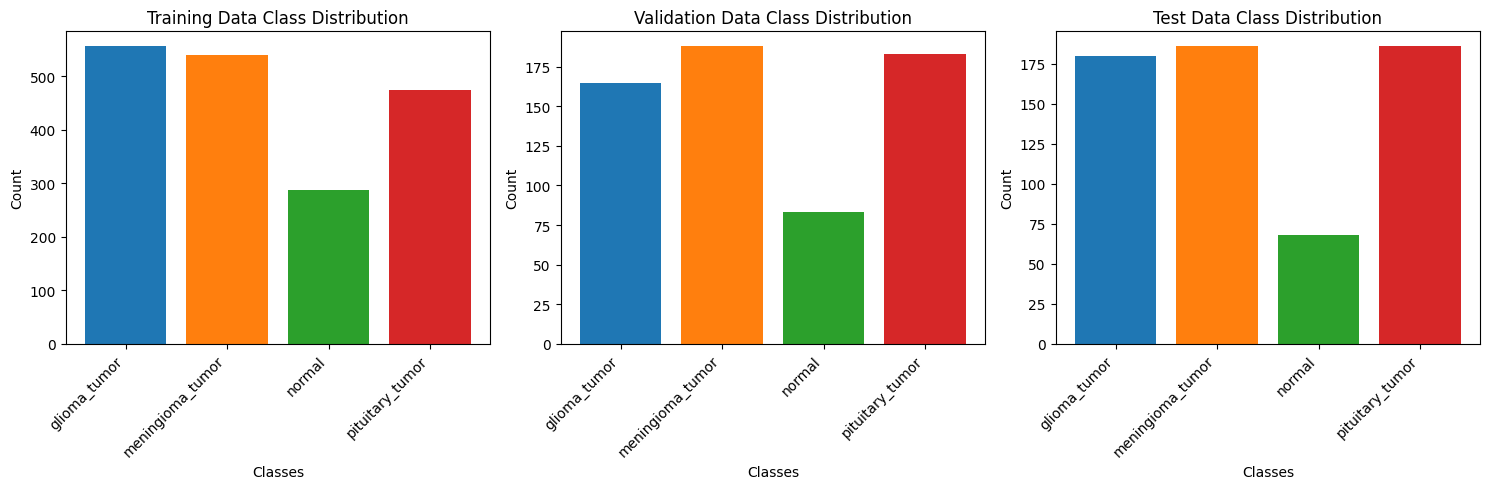

In [27]:
train_labels = [label for _, label in train_set]
val_labels = [label for _, label in val_set]
test_labels = [label for _, label in test_set]



train_label_counts = np.bincount(train_labels)
val_label_counts = np.bincount(val_labels)
test_label_counts = np.bincount(test_labels)


bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(class_names, train_label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Training Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.bar(class_names, val_label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Validation Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.bar(class_names, test_label_counts[:len(class_names)], color=bar_colors)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Test Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

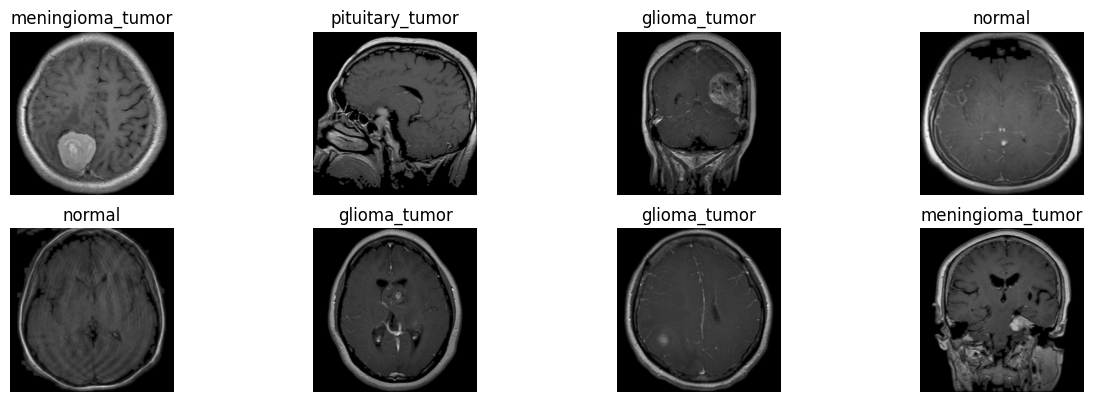

In [35]:

batch_size = 32  
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

for images, labels in train_loader:
    break

plt.figure(figsize=(15, 20))
for i in range(8):
    ax = plt.subplot(8, 4, i + 1)

    image = images[i].permute(1, 2, 0).numpy()
    image = (image * 255).astype("uint8")
    
    plt.imshow(image)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.show()

Basic Model